In [1]:
import json

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 词袋 (bag-of-words)
# 词袋是对单词的出现次数的统计列表
# 词袋如果单单统计单词出现的个数，远远不能理解语义，not bad是positive的 但是如果分开看not 和 bad就是negative

In [3]:
# n元词袋 n-gram
# n元词袋可以用n个词来进行表示，如二元词袋 "knocked on" "on the " "the door" 在一个句子中 n-gram是允许单词重复的 找到合适的组合即可

In [4]:
# n-gram会比单词多得多，n-gram需要很强的计算，存储和建模能力， n越大表示的信息越丰富；同时计算量会骤增

In [5]:
dataset_root_path = 'feature_engineering/dataset/'

In [6]:
f = open(dataset_root_path + 'yelp_dataset/yelp_academic_dataset_review.json')
js = []
for i in range(10000):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)

In [7]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [8]:
review_df['text'][0:5]

0    Apparently Prides Osteria had a rough summer a...
1    This store is pretty good. Not as great as Wal...
2    I called WVM on the recommendation of a couple...
3    I've stayed at many Marriott and Renaissance M...
4    The food is always great here. The service fro...
Name: text, dtype: object

In [9]:
# 创建1-gram转换器
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')

In [10]:
# 1-gram转换文本数据
bow_converter.fit(review_df['text'])

CountVectorizer(token_pattern='(?u)\\b\\w+\\b')

In [11]:
# 获取词汇表
words = bow_converter.get_feature_names()

In [12]:
len(words)

26558

In [13]:
words[10000:10005]

['gastroentestinal',
 'gastromania',
 'gastromolecular',
 'gastronomic',
 'gastronomy']

In [14]:
bigram_converter = CountVectorizer(ngram_range=(2,2),token_pattern='(?u)\\b\\w+\\b')
bigram_converter.fit(review_df['text'])
bigram = bigram_converter.get_feature_names()

In [15]:
len(bigram)

314991

In [16]:
# 两个词的短语
bigram[10000:10005]

['above that', 'above the', 'above typical', 'above us', 'above wasted']

In [17]:
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
trigram_converter.fit(review_df['text'])
trigram = trigram_converter.get_feature_names()

In [18]:
len(trigram)

734771

In [19]:
# 三个词的词袋
trigram[100000:100005]

['become interested in',
 'become jaded the',
 'become just that',
 'become lost a',
 'become more dim']

Text(0.5, 1.0, 'Number of ngrams in the first 10,000 reviews of the Yelp dataset')

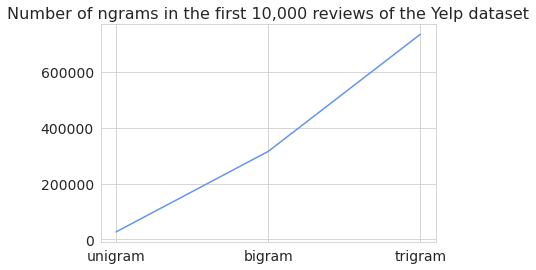

In [20]:
sns.set_style('whitegrid')                  # sns设定白色网格风格
fig,ax = plt.subplots()                     # subplots默认一个子图
gram_count = [len(words), len(bigram), len(trigram)]
plt.plot(gram_count,color='cornflowerblue')
plt.xticks(range(3), ['unigram','bigram','trigram'])
plt.tick_params(labelsize = 14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', {'fontsize' : 16})

In [ ]:
# 词袋是在NLP中一种简单有效的启发式方法 但是和正确的语义还相差甚远